## Imports

In [72]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import pandas as pd
from scipy.optimize import curve_fit

C:\Users\17135\AppData\Local\Temp\ipykernel_46712\3447420317.py:5: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.optimize import curve_fit


Questions
- What are the units of R_eff - perhaps arcminutes
- Formula for Mstar
- Handling -999
- What do sigma errors in table mean (upper and lower error bar?)
- Implementing Wolf formula - did I do it right?
- Properly fitting Hernquist profile

Data Table

In [67]:
def csv_to_dataframe(csv_file):
    csv_content = pd.read_csv(csv_file)
    df = pd.DataFrame(csv_content)
    return df

csv_file = 'table1A_20260110.csv'
df_clean = csv_to_dataframe(csv_file)
print(df_clean)

#df_clean = df.iloc[1:].copy()   # drop first row
#print(df_clean)

            Name Name2          RA        Dec   Dist   MV  R_eff Type Phot  \
0    Aquarius II  Aqr2  338.481300  -9.327400  108.0 -4.4   5.10    G   LS   
1   Aquarius III  Aqr3  357.220000  -3.490000   85.0 -2.5   2.10    G   LS   
2       Bootes I  Boo1  210.020035  14.513500   66.0 -6.0  10.50    G   LS   
3      Bootes II  Boo2  209.514130  12.855278   42.0 -2.9   3.07    G   LS   
4     Bootes III  Boo3  209.300000  26.800000   46.0 -5.8  30.00    G   LS   
..           ...   ...         ...        ...    ...  ...    ...  ...  ...   
73         UMa 1  UMa1  158.770584  51.947979   97.0 -5.1   8.13    G   LS   
74         UMa 2  UMa2  132.872635  63.133530   34.6 -4.3  13.90    G   LS   
75    Ursa Minor   UMi  227.241959  67.222138   70.0 -9.0  18.20    G   LS   
76      Unions 1  UNI1  174.708000  31.071100   10.0  2.0   2.20    U   LS   
77     Willman 1    W1  162.343628  51.050083   38.5 -2.5   2.51    G   MZ   

    N_mask  N_mem     vhel  vhelerr    sigma  serr_low  serr_up

## Problem 1 - Plot the velocity dispersion of (a) galaxies and (b) globular clusters as a function of R_eff

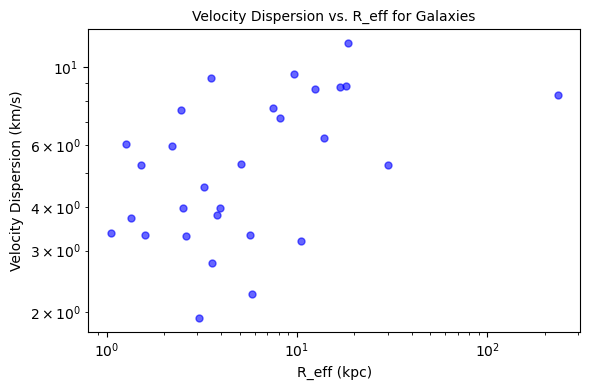

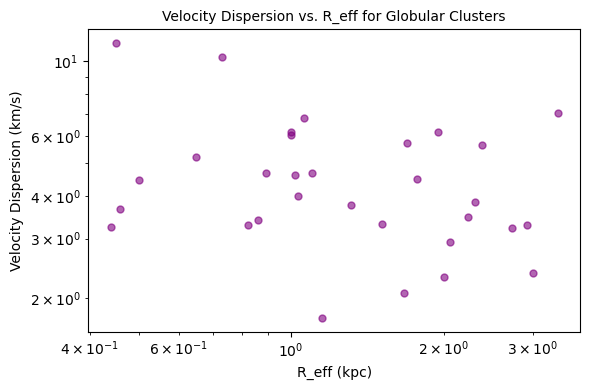

In [68]:
type_galactic_object = df_clean.iloc[:, 7].astype(str)
# print(type_galactic_object)

velocity_dispersion_g = []
reff_g = []
velocity_dispersion_gc = []
reff_gc = []

sigma = df_clean.iloc[:, 13].astype(float)
R_eff = df_clean.iloc[:, 6].astype(float)

for i, j in type_galactic_object.items():
    if j == 'G':
        velocity_dispersion_g.append(sigma.loc[i])
        reff_g.append(R_eff.loc[i])
    elif j == 'GC':
        velocity_dispersion_gc.append(sigma.loc[i])
        reff_gc.append(R_eff.loc[i])

plt.figure(figsize=(6,4))
plt.scatter(reff_g, velocity_dispersion_g, s=25, marker="o", alpha=0.6, c = "blue")
plt.xscale("log")
plt.yscale("log")

plt.xlabel('R_eff (kpc)', fontsize = 10)  
plt.ylabel('Velocity Dispersion (km/s)', fontsize = 10)  
plt.title('Velocity Dispersion vs. R_eff for Galaxies', fontsize = 10)  
plt.grid(False)  
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(reff_gc, velocity_dispersion_gc, s=25, marker="o", alpha=0.6, c = "purple")
plt.xscale("log")
plt.yscale("log")

plt.xlabel('R_eff (kpc)', fontsize = 10)  
plt.ylabel('Velocity Dispersion (km/s)', fontsize = 10)  
plt.title('Velocity Dispersion vs. R_eff for Globular Clusters', fontsize = 10)  
plt.grid(False)  
plt.tight_layout()
plt.show()

## Problem 2 - Using the Wolf et al. (2010) mass estimator we discussed in class, plot M_dyn vs r_1/2 for the same two samples. Include error bars on the mass and make sure to propagate errors on σ.

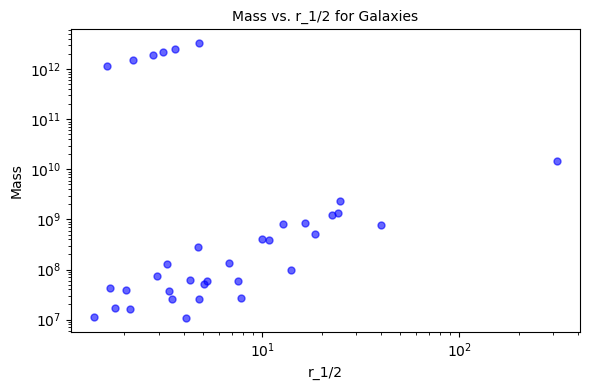

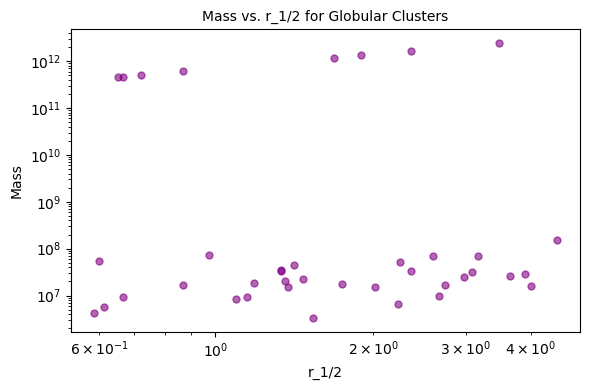

In [ ]:
# for G and GC, plot M_dyn vs. r_1/2
# propagate error on sigma and include error bars on M in plots

sigmaerrlow = df_clean.iloc[:, 14].astype(float)
sigmaerrup = df_clean.iloc[:, 15].astype(float)


def calculate_M_dyn(sigma_i, R_eff_i):
    # using Wolf et al. 2010 to calculate M_dyn
    # M_1/2 = 3/G <sigma> r_1/2 ~ 4/G <sigma> R_eff
    # sigma is in km/s
    # R_eff is in kpc? or is it in arcminutes?

    G = 4.3009172706e-3 # pc*M^−1*(km/s)^2
    M_dyn = (4.0 / G) * (sigma_i**2) * (R_eff_i * 1e3) # assuming kpc, converting to pc

    return M_dyn

def error_M_dyn(sigma_i, R_eff_i, sigmaerrlow, sigmaerrup):
 # find error associated with mass based on the error associated with sigma and error propagation
    M_dyn_local = calculate_M_dyn(sigma_i, R_eff_i)

    sig_low  = sigma_i - sigmaerrlow # lower bound for velocity dispersion
    sig_high = sigma_i + sigmaerrup # upper bound for velocity dispersion

    M_low  = calculate_M_dyn(sig_low,  R_eff_i) # lower bound for M_dyn
    M_high = calculate_M_dyn(sig_high, R_eff_i) # upper bound for M_dyn

    errorM_low = M_dyn_local - M_low # M_dyn - lower bound
    errorM_high = M_high - M_dyn_local # upper bound - M_dyn 

    return M_dyn_local, errorM_low, errorM_high # correspond with serr_low and serr_up but for M_dyn
    
def reff_to_rhalf(R_eff_i):
    R_half = R_eff_i * (4.0 / 3.0)
    return R_half # units of kpc - assuming R_eff is in kpc 

rhalf_g = []
M_g = []
rhalf_gc = []
M_gc = []


for i, j in type_galactic_object.items():
    s = sigma.loc[i]
    r = R_eff.loc[i]
    if j == 'G':
        rhalf_g.append(reff_to_rhalf(r))
        M_g.append(calculate_M_dyn(s,r))
    elif j == 'GC':
        rhalf_gc.append(reff_to_rhalf(r))
        M_gc.append(calculate_M_dyn(s,r))

    
plt.figure(figsize=(6,4))
plt.scatter(rhalf_g, M_g, s=25, marker="o", alpha=0.6, c = "blue")
plt.xscale("log")
plt.yscale("log")    
plt.xlabel('r_1/2', fontsize = 10)  
plt.ylabel('Mass', fontsize = 10)  
plt.title('Mass vs. r_1/2 for Galaxies', fontsize = 10)  
plt.grid(False)  
plt.tight_layout()
plt.show()
   

plt.figure(figsize=(6,4))
plt.scatter(rhalf_gc, M_gc, s=25, marker="o", alpha=0.6, c = "purple")
plt.xscale("log")
plt.yscale("log")    
plt.xlabel('r_1/2', fontsize = 10)  
plt.ylabel('Mass', fontsize = 10)  
plt.title('Mass vs. r_1/2 for Globular Clusters', fontsize = 10)  
plt.grid(False)  
plt.tight_layout()
plt.show()


## Problem 3 - Assuming that both the globular clusters and galaxies have V -band mass-to-light ratios of 2, plot M_dyn/M⋆ as a function of r_1/2 and separately as a function of M⋆. Are these objects dominated by dark matter or baryonic matter within r1/2? 

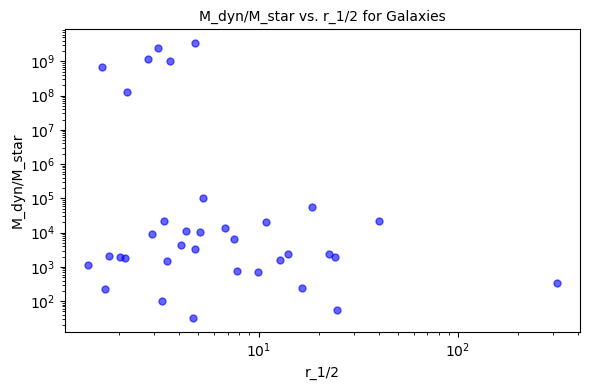

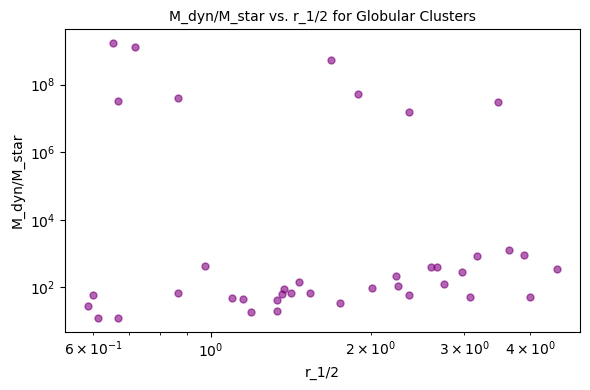

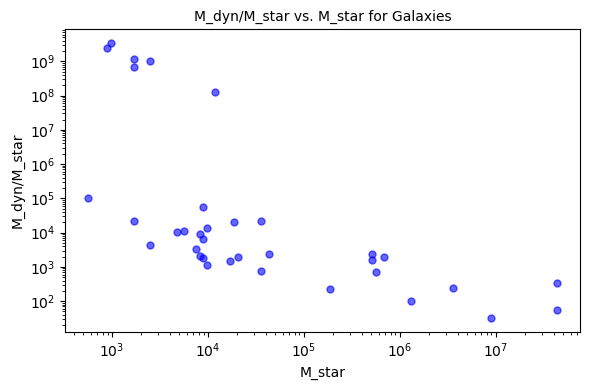

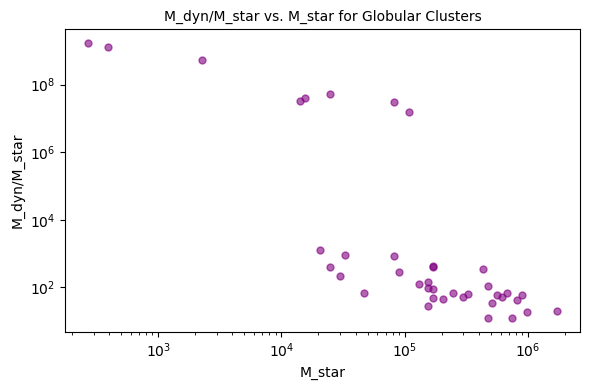

In [71]:
def calculate_mstar(Mv):
    M_star = 2 * 10**(-0.4 * (Mv - 4.83))   # in Msun
    return M_star

MV = df_clean.iloc[:, 5].astype(float)
Mstar_g = []
Mstar_gc = []

for i, j in type_galactic_object.items():
    mv = MV.iloc[i]
    if j == 'G':
        Mstar_g.append(calculate_mstar(mv))
    elif j == 'GC':
        Mstar_gc.append(calculate_mstar(mv))

ratio_g  = [m_g/m_s for m_g, m_s in zip(M_g,  Mstar_g)]
ratio_gc = [m_g/m_s for m_g, m_s in zip(M_gc, Mstar_gc)]


plt.figure(figsize=(6,4))
plt.scatter(rhalf_g, ratio_g, s=25, marker="o", alpha=0.6, c = "blue")
plt.xscale("log")
plt.yscale("log")    
plt.xlabel('r_1/2', fontsize = 10)  
plt.ylabel('M_dyn/M_star', fontsize = 10)  
plt.title('M_dyn/M_star vs. r_1/2 for Galaxies', fontsize = 10)  
plt.grid(False)  
plt.tight_layout()
plt.show()
   

plt.figure(figsize=(6,4))
plt.scatter(rhalf_gc, ratio_gc, s=25, marker="o", alpha=0.6, c = "purple")
plt.xscale("log")
plt.yscale("log")    
plt.xlabel('r_1/2', fontsize = 10)  
plt.ylabel('M_dyn/M_star', fontsize = 10)  
plt.title('M_dyn/M_star vs. r_1/2 for Globular Clusters', fontsize = 10)  
plt.grid(False)  
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(Mstar_g, ratio_g, s=25, marker="o", alpha=0.6, c = "blue")
plt.xscale("log")
plt.yscale("log")    
plt.xlabel('M_star', fontsize = 10)  
plt.ylabel('M_dyn/M_star', fontsize = 10)  
plt.title('M_dyn/M_star vs. M_star for Galaxies', fontsize = 10)  
plt.grid(False)  
plt.tight_layout()
plt.show()
   

plt.figure(figsize=(6,4))
plt.scatter(Mstar_gc, ratio_gc, s=25, marker="o", alpha=0.6, c = "purple")
plt.xscale("log")
plt.yscale("log")    
plt.xlabel('M_star', fontsize = 10)  
plt.ylabel('M_dyn/M_star', fontsize = 10)  
plt.title('M_dyn/M_star vs. M_star for Globular Clusters', fontsize = 10)  
plt.grid(False)  
plt.tight_layout()
plt.show()


## Problem 4 - Fit a Hernquist profile to the M_dyn vs r_1/2 data for galaxies. What is the best-fitting total mass M and scale radius a? How do these compare to M_dyn(< r_1/2) and r_1/2?

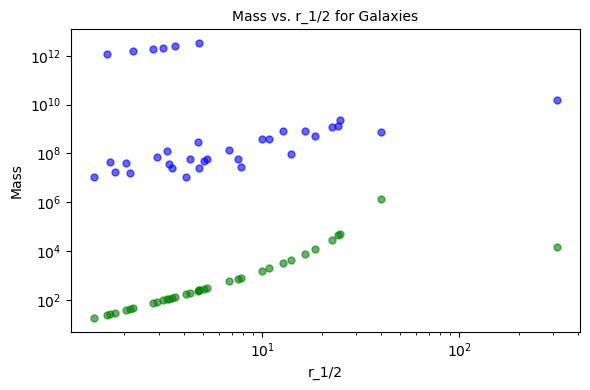

10983.142444774212 -36.42447796234384


In [89]:
def hernquist_profile_fit(r, M, a):
    hernquist = M * (r**2) / (r + a)**2
    return hernquist 

rhalf_g_array = np.array(rhalf_g)
popt, cov = curve_fit(hernquist_profile_fit, rhalf_g, M_g, p0=[100,0.9])

# need to add this fit to this plot somehow

plt.figure(figsize=(6,4))
plt.scatter(rhalf_g, M_g, s=25, marker="o", alpha=0.6, c = "blue")
plt.scatter(rhalf_g_array, hernquist_profile_fit(rhalf_g_array, popt[0], popt[1]), s=25, marker="o", alpha=0.6, c = "green")
plt.xscale("log")
plt.yscale("log")    
plt.xlabel('r_1/2', fontsize = 10)  
plt.ylabel('Mass', fontsize = 10)  
plt.title('Mass vs. r_1/2 for Galaxies', fontsize = 10)  
plt.grid(False)  
plt.tight_layout()
plt.show()

print(popt[0], popt[1])

## Problem 5 - Do globular clusters and galaxies always separate out cleanly based on dynamics (that is, is it always possible to say “object X is a galaxy and object Y is a globular cluster” if we just know MV , R_eff , and σ_LOS)? Why or why not (explain your answer)?